In [1]:
import gym
import random
import numpy as np
import tqdm

from lib.q_learning import QLeaning

# Hyper parameters

In [2]:
total_episodes = 20000
learning_rate = 0.8
max_steps = 99
gamma = 0.95

# Exploration parameters
max_epsilon = 1.0
min_epsilon = 0.0

# Initialize environment

In [3]:
env = gym.make("Taxi-v3")
env.action_space.n, env.observation_space.n

(6, 500)

# Train Q learning agent

In [4]:
decay_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]

rewards_by_decay_rate = []
for decay_rate in decay_rates:
    epsilon = 1.0
    agent = QLeaning(action_size=env.action_space.n,
                 state_size=env.observation_space.n)
    rewards = []
    for episode in tqdm.tqdm(range(total_episodes)):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0

        for step in range(max_steps):
            exp_exp_tradeoff = random.uniform(0, 1)

            if exp_exp_tradeoff > epsilon:
                # exploitation
                action = agent.get_action(state)
            else:
                # exploration
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)

            agent.update(state, action, new_state, reward, learning_rate, gamma)

            total_rewards += reward

            # Our new state is state
            state = new_state

            # If done (if we're dead) : finish episode
            if done == True:
                break

        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
        rewards.append(total_rewards)
    rewards_by_decay_rate.append(rewards)

100%|██████████| 20000/20000 [00:06<00:00, 3034.75it/s]


In [5]:
rewards_by_decay_rate[1][:10]

[-441, -324, -342, -450, -369, -432, -369, -351, -441, -459]

# Plot reward over time

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

from lib.utils import SMA

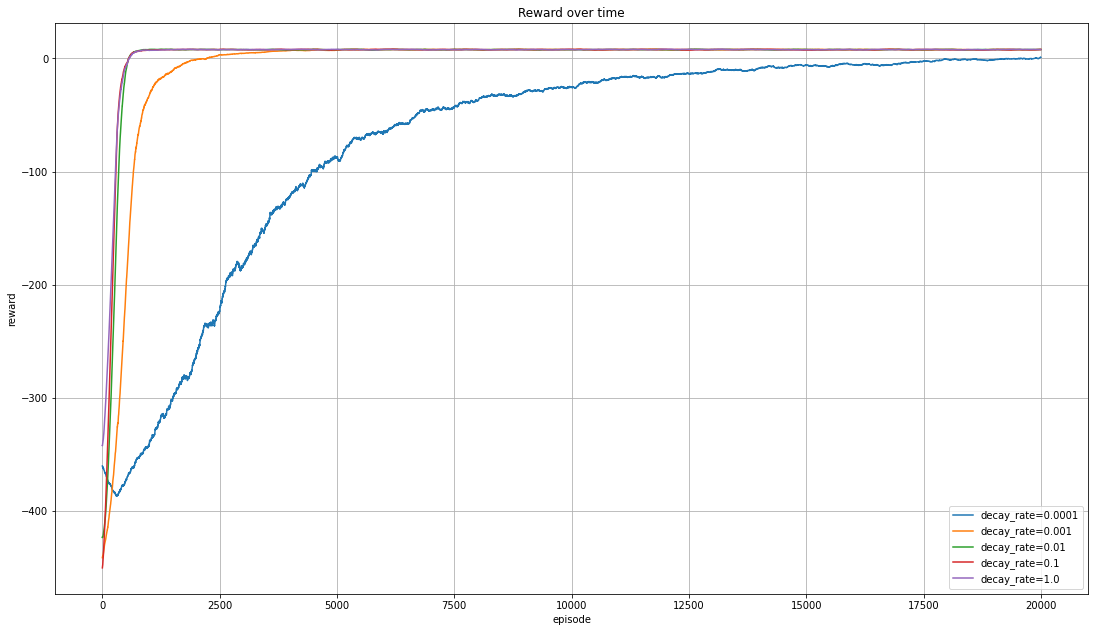

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

for rewards, decay_rate in zip(rewards_by_decay_rate, decay_rates):
    smoothed_rewards = SMA(rewards, 300)

    x = list(range(len(smoothed_rewards)))
    y = smoothed_rewards

    ax.plot(x, y, label='decay_rate={}'.format(decay_rate))

ax.legend()
ax.set(xlabel='episode', ylabel='reward',
       title='Reward over time')
ax.grid()

plt.show()


In [82]:
env.reset()
total_rewards = 0
for step in range(max_steps):
    env.render()
    exp_exp_tradeoff = random.uniform(0, 1)

    if exp_exp_tradeoff > epsilon:
        # exploitation
        action = agent.get_action(state)
    else:
        # exploration
        action = env.action_space.sample()

    # Take the action (a) and observe the outcome state(s') and reward (r)
    new_state, reward, done, info = env.step(action)

    total_rewards += reward

    # Our new state is state
    state = new_state

    # If done (if we're dead) : finish episode
    if done == True:
        break
print(total_rewards)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : :_|
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
12


# Note
- Increase the epsilon decay rate may increase the convergence speed.
- Should let epsilon always be greater than 0. Because it's possible that the agent is optimized to a local maxima.